## Causality between Rainfall and Water Level


Granger causality is a statistical hypothesis test to determine whether one time series can predict another. 
Essentially, it assesses whether past values of one variable contain useful information for predicting future values of another variable. <br>


Since we have multiple predictor variables, we would test for multivariate Granger Causality. We would make use of VAR (Vector Autoregressive) models.

Hypothesis Test:

H_0: None of the rainfall time series Granger-cause the water level time series. <br>
H_A: At least one of the rainfall time series Granger-causes the water level time series. 

Python statsmodels package: https://www.statsmodels.org/stable/vector_ar.html

Sample Paper (Multivariate Granger Causality): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3971884/

Multivariate Granger-Causality: https://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.var_model.VARResults.test_causality.html

In [3]:
import pandas as pd
# 2021-2022 hourly data
df = pd.read_csv("2021-2022 data.csv")

In [37]:
df.head()

,Unnamed: 0,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,datetime
0,0,0.0,0.0,0.0,0.0,0.0,12.72,2021-01-01 00:00:00
1,1,0.0,0.0,0.0,0.0,0.0,12.71,2021-01-01 01:00:00
2,2,0.0,0.0,0.0,0.0,0.0,12.73,2021-01-01 02:00:00
3,3,0.0,0.0,0.0,0.0,0.0,12.70,2021-01-01 03:00:00
4,4,0.0,0.0,0.0,0.0,0.0,12.68,2021-01-01 04:00:00


In [38]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           17520 non-null  int64         
 1   Rainfall_Aries       17520 non-null  float64       
 2   Rainfall_Boso        17520 non-null  float64       
 3   Rainfall_Campana     17520 non-null  float64       
 4   Rainfall_Nangka      17520 non-null  float64       
 5   Rainfall_Oro         17520 non-null  float64       
 6   Waterlevel_Sto_Nino  17520 non-null  float64       
 7   datetime             17520 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 1.1 MB


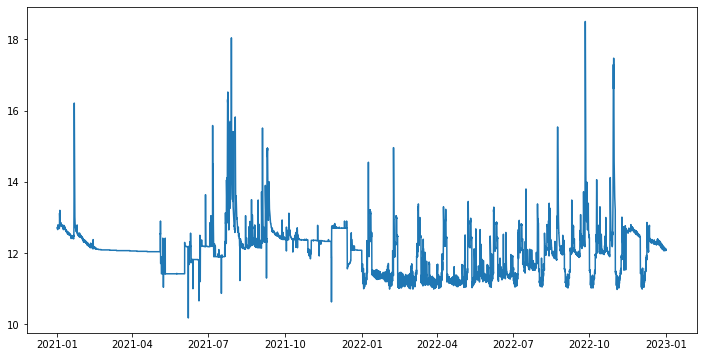

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
waterlevel = plt.plot(df["datetime"], df["Waterlevel_Sto_Nino"])

In [41]:
#Check for Stationarity and Autocorrelation

from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
adfuller(df["Waterlevel_Sto_Nino"])[1]
# Since p val is less than 0.05, the time series is stationary. 

2.686314987400812e-12

In [42]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(df["Waterlevel_Sto_Nino"])

# Since all the p-values from lags 1-10 are less than 0.05, we conclude that the time series is autocorrelated. 

,lb_stat,lb_pvalue
1,16944.681526,0.0
2,33394.643429,0.0
3,49303.937322,0.0
4,64652.074889,0.0
5,79450.299309,0.0
6,93725.968868,0.0
7,107489.859388,0.0
8,120765.494799,0.0
9,133589.440195,0.0
10,145999.570578,0.0


In [51]:
print(adfuller(df["Rainfall_Aries"])[1])
print(adfuller(df["Rainfall_Boso"])[1])
print(adfuller(df["Rainfall_Campana"])[1])
print(adfuller(df["Rainfall_Nangka"])[1])
print(adfuller(df["Rainfall_Oro"])[1])

# All of the rainfall time series are stationary. 

4.729826525980123e-30
3.8125727783297586e-30
0.0
2.850563523992032e-30
0.0


## Pairwise Granger Causality Tests
- Each rainfall station in isolation Granger-causes the water level in Sto. Nino when considering lags of periods one to ten.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

print("Aries Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Aries"]], 10)

In [ ]:
print("Boso-Boso Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Boso"]], 10)

In [ ]:
print("Campana Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Campana"]], 10)

In [ ]:
print("Mt.Nangka Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Nangka"]], 10)

In [ ]:
print("Mt.Oro Causes Sto Nino?")
grangercausalitytests(df[["Waterlevel_Sto_Nino", "Rainfall_Oro"]], 10)

## Multivariate Granger Causality Tests

In [58]:
# Create a VAR model

model = VAR(df[["Waterlevel_Sto_Nino","Rainfall_Aries", "Rainfall_Boso", "Rainfall_Campana", "Rainfall_Nangka", "Rainfall_Oro"]])

In [59]:
# Lag Order Selection
# For parsimony, we only consider lags up to 10. 
results = model.fit(maxlags = 10, ic = 'bic')
# VAR(2) was selected.
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2024
Time:                     17:05:08
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                  -0.450391
Nobs:                     17518.0    HQIC:                 -0.473599
Log likelihood:          -144816.    FPE:                   0.615702
AIC:                    -0.484992    Det(Omega_mle):        0.612968
--------------------------------------------------------------------
Results for equation Waterlevel_Sto_Nino
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.309148         0.016491           18.747           0.000
L1.Waterlevel_Sto_Nino         0.851477         0.007639          111.468           0.000
L1.Rainfal

In [61]:
granger = results.test_causality('Waterlevel_Sto_Nino', ['Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro'], kind='f')

In [65]:
granger.summary()

Test statistic,Critical value,p-value,df
135.7,1.831,0.000,"(10, 105030)"


Conclusion: The five rainfall stations Granger-cause the water level at Sto. Nino.

# 2016 - 2017 data

In [5]:
df_2016 = pd.read_csv("compiled_data_2016_2017.csv")

In [7]:
df_2016

,Unnamed: 0,index,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x
0,0,0,0,1,2,0,0,12.18,21.03,21.033407,14.842428,803.88,630.9,0.026165,0.023526,2016-01-01 00:00:00,0.0,14420
1,1,1,0,1,1,1,0,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 01:00:00,3600.0,14420
2,2,2,1,1,1,0,1,12.19,21.03,21.280072,14.842428,804.54,630.9,0.026450,0.023526,2016-01-01 02:00:00,7200.0,14420
3,3,3,0,0,0,1,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 03:00:00,10800.0,14420
4,4,4,1,1,1,0,0,12.20,21.03,21.529056,14.842428,805.20,630.9,0.026738,0.023526,2016-01-01 04:00:00,14400.0,14420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17515,16059,0,0,0,0,0,12.44,21.18,28.244204,17.224575,821.04,635.4,0.034401,0.027108,2017-12-31 19:00:00,63140400.0,14420
17516,17516,16424,0,0,0,0,0,12.44,21.18,28.244204,17.224575,821.04,635.4,0.034401,0.027108,2017-12-31 20:00:00,63144000.0,14420
17517,17517,16789,0,0,0,0,0,12.44,21.18,28.244204,17.224575,821.04,635.4,0.034401,0.027108,2017-12-31 21:00:00,63147600.0,14420
17518,17518,17154,0,0,0,0,0,12.44,21.18,28.244204,17.224575,821.04,635.4,0.034401,0.027108,2017-12-31 22:00:00,63151200.0,14420


In [33]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
# Check for stationarity
print(adfuller(df_2016["Waterlevel_Sto_Nino"])[1])
print(adfuller(df_2016["Rainfall_Aries"])[1])
print(adfuller(df_2016["Rainfall_Boso"])[1])
print(adfuller(df_2016["Rainfall_Campana"])[1])
print(adfuller(df_2016["Rainfall_Nangka"])[1])
print(adfuller(df_2016["Rainfall_Oro"])[1])


# Check for autocorrelation
acorr_ljungbox(df_2016["Waterlevel_Sto_Nino"])

# both autocorrelated and stationary

4.156583681414367e-08
0.0
0.0
0.0
0.0
0.0


,lb_stat,lb_pvalue
1,17326.328437,0.0
2,34275.575894,0.0
3,50800.063541,0.0
4,66900.750979,0.0
5,82591.224571,0.0
6,97884.921983,0.0
7,112794.634998,0.0
8,127338.985959,0.0
9,141539.259632,0.0
10,155419.289238,0.0


In [14]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

In [15]:
# Pairwise Granger Causality

print("Aries causes water level in Sto. Nino?")
grangercausalitytests(df_2016[["Waterlevel_Sto_Nino", "Rainfall_Aries"]], 10)

Aries causes water level in Sto. Nino?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2484.5303, p=0.0000  , df_denom=17516, df_num=1
ssr based chi2 test:   chi2=2484.9558, p=0.0000  , df=1
likelihood ratio test: chi2=2323.7909, p=0.0000  , df=1
parameter F test:         F=2484.5303, p=0.0000  , df_denom=17516, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=487.6664, p=0.0000  , df_denom=17513, df_num=2
ssr based chi2 test:   chi2=975.6113, p=0.0000  , df=2
likelihood ratio test: chi2=949.4128, p=0.0000  , df=2
parameter F test:         F=487.6664, p=0.0000  , df_denom=17513, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=322.6806, p=0.0000  , df_denom=17510, df_num=3
ssr based chi2 test:   chi2=968.4288, p=0.0000  , df=3
likelihood ratio test: chi2=942.6065, p=0.0000  , df=3
parameter F test:         F=322.6806, p=0.0000  , df_denom=17510, df_num=3

Granger Causality
number of lags (no z

{1: ({'ssr_ftest': (2484.5302757859836, 0.0, 17516.0, 1),
   'ssr_chi2test': (2484.9558062054493, 0.0, 1),
   'lrtest': (2323.7909026444468, 0.0, 1),
   'params_ftest': (2484.5302757859695, 0.0, 17516.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (487.66643269057215, 7.87904726681599e-207, 17513.0, 2),
   'ssr_chi2test': (975.6113250583501, 1.4082913845269026e-212, 2),
   'lrtest': (949.4127965915395, 6.880669470690715e-207, 2),
   'params_ftest': (487.66643269060506, 7.87904726657369e-207, 17513.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (322.680617759129, 6.040409629054353e-204, 17510.0, 3),
   'ssr_chi2test': (968.4288488783546, 1.269898729963577e-209, 3),
   'lrtest': (942.6064808869123, 5.0718762831518096e-204, 3),
   'params_ftest': (322.6806177591422, 6.040409628942762e-204, 17510.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])]),
 4

In [16]:
print("Boso-Boso Causes Sto Nino?")
grangercausalitytests(df_2016[["Waterlevel_Sto_Nino", "Rainfall_Boso"]], 10)

Boso-Boso Causes Sto Nino?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1756.2156, p=0.0000  , df_denom=17516, df_num=1
ssr based chi2 test:   chi2=1756.5164, p=0.0000  , df=1
likelihood ratio test: chi2=1673.9353, p=0.0000  , df=1
parameter F test:         F=1756.2156, p=0.0000  , df_denom=17516, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=419.1412, p=0.0000  , df_denom=17513, df_num=2
ssr based chi2 test:   chi2=838.5218, p=0.0000  , df=2
likelihood ratio test: chi2=819.0716, p=0.0000  , df=2
parameter F test:         F=419.1412, p=0.0000  , df_denom=17513, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=291.3658, p=0.0000  , df_denom=17510, df_num=3
ssr based chi2 test:   chi2=874.4468, p=0.0000  , df=3
likelihood ratio test: chi2=853.3209, p=0.0000  , df=3
parameter F test:         F=291.3658, p=0.0000  , df_denom=17510, df_num=3

Granger Causality
number of lags (no zero) 4
ssr b

{1: ({'ssr_ftest': (1756.2156230906353, 0.0, 17516.0, 1),
   'ssr_chi2test': (1756.5164136175406, 0.0, 1),
   'lrtest': (1673.9352770524856, 0.0, 1),
   'params_ftest': (1756.21562309035, 0.0, 17516.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (419.14123233210256, 1.5546378413822905e-178, 17513.0, 2),
   'ssr_chi2test': (838.5217961507192, 8.266191992158116e-183, 2),
   'lrtest': (819.0715878620395, 1.3831349448390138e-178, 2),
   'params_ftest': (419.1412323320446, 1.5546378414677453e-178, 17513.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (291.3657885256788, 1.381747247585936e-184, 17510.0, 3),
   'ssr_chi2test': (874.4468048436863, 3.087390260002768e-189, 3),
   'lrtest': (853.3208784377639, 1.179586796837889e-184, 3),
   'params_ftest': (291.36578852555766,
    1.3817472478253356e-184,
    17510.0,
    3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 

In [17]:
print("Campana Causes Sto Nino?")
grangercausalitytests(df_2016[["Waterlevel_Sto_Nino", "Rainfall_Campana"]], 10)

Campana Causes Sto Nino?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=865.3441, p=0.0000  , df_denom=17516, df_num=1
ssr based chi2 test:   chi2=865.4923, p=0.0000  , df=1
likelihood ratio test: chi2=844.7923, p=0.0000  , df=1
parameter F test:         F=865.3441, p=0.0000  , df_denom=17516, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=177.3595, p=0.0000  , df_denom=17513, df_num=2
ssr based chi2 test:   chi2=354.8203, p=0.0000  , df=2
likelihood ratio test: chi2=351.2747, p=0.0000  , df=2
parameter F test:         F=177.3595, p=0.0000  , df_denom=17513, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=140.4363, p=0.0000  , df_denom=17510, df_num=3
ssr based chi2 test:   chi2=421.4772, p=0.0000  , df=3
likelihood ratio test: chi2=416.4865, p=0.0000  , df=3
parameter F test:         F=140.4363, p=0.0000  , df_denom=17510, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F

{1: ({'ssr_ftest': (865.3440759088805, 1.0725093456635432e-185, 17516.0, 1),
   'ssr_chi2test': (865.4922851020597, 3.1156333106670457e-190, 1),
   'lrtest': (844.7923254334601, 9.856662013775599e-186, 1),
   'params_ftest': (865.3440759083121, 1.072509345953859e-185, 17516.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (177.35949449321993, 5.539144608288199e-77, 17513.0, 2),
   'ssr_chi2test': (354.82026203759796, 8.948681784013394e-78, 2),
   'lrtest': (351.27468521923583, 5.268309593877166e-77, 2),
   'params_ftest': (177.35949449312216, 5.539144608815439e-77, 17513.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (140.4362565085349, 6.417538072367041e-90, 17510.0, 3),
   'ssr_chi2test': (421.47719678926427, 4.928825744860593e-91, 3),
   'lrtest': (416.4865031272784, 5.941341389582912e-90, 3),
   'params_ftest': (140.4362565087211, 6.417538070614202e-90, 17510.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0

In [18]:
print("Mt.Nangka Causes Sto Nino?")
grangercausalitytests(df_2016[["Waterlevel_Sto_Nino", "Rainfall_Nangka"]], 10)

Mt.Nangka Causes Sto Nino?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3120.4841, p=0.0000  , df_denom=17516, df_num=1
ssr based chi2 test:   chi2=3121.0185, p=0.0000  , df=1
likelihood ratio test: chi2=2872.1670, p=0.0000  , df=1
parameter F test:         F=3120.4841, p=0.0000  , df_denom=17516, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=538.2120, p=0.0000  , df_denom=17513, df_num=2
ssr based chi2 test:   chi2=1076.7314, p=0.0000  , df=2
likelihood ratio test: chi2=1044.9374, p=0.0000  , df=2
parameter F test:         F=538.2120, p=0.0000  , df_denom=17513, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=326.8306, p=0.0000  , df_denom=17510, df_num=3
ssr based chi2 test:   chi2=980.8837, p=0.0000  , df=3
likelihood ratio test: chi2=954.4049, p=0.0000  , df=3
parameter F test:         F=326.8306, p=0.0000  , df_denom=17510, df_num=3

Granger Causality
number of lags (no zero) 4
ssr

{1: ({'ssr_ftest': (3120.4840690704746, 0.0, 17516.0, 1),
   'ssr_chi2test': (3121.0185205552434, 0.0, 1),
   'lrtest': (2872.167025079216, 0.0, 1),
   'params_ftest': (3120.4840690693445, 0.0, 17516.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (538.2120180985396, 1.4437239211748364e-227, 17513.0, 2),
   'ssr_chi2test': (1076.7313576257886, 1.5515166675531514e-234, 2),
   'lrtest': (1044.9374273381545, 1.2437144679138447e-227, 2),
   'params_ftest': (538.2120180984383, 1.4437239213132e-227, 17513.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (326.8305827478381, 1.6700236664153912e-206, 17510.0, 3),
   'ssr_chi2test': (980.8837209584033, 2.5234645480108803e-212, 3),
   'lrtest': (954.4048833183915, 1.399179887316081e-206, 3),
   'params_ftest': (326.8305827479963, 1.6700236660420322e-206, 17510.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])

In [19]:
print("Mt.Oro Causes Sto Nino?")
grangercausalitytests(df_2016[["Waterlevel_Sto_Nino", "Rainfall_Oro"]], 10)

Mt.Oro Causes Sto Nino?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1177.4458, p=0.0000  , df_denom=17516, df_num=1
ssr based chi2 test:   chi2=1177.6474, p=0.0000  , df=1
likelihood ratio test: chi2=1139.7550, p=0.0000  , df=1
parameter F test:         F=1177.4458, p=0.0000  , df_denom=17516, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=323.5724, p=0.0000  , df_denom=17513, df_num=2
ssr based chi2 test:   chi2=647.3295, p=0.0000  , df=2
likelihood ratio test: chi2=635.6561, p=0.0000  , df=2
parameter F test:         F=323.5724, p=0.0000  , df_denom=17513, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=236.7329, p=0.0000  , df_denom=17510, df_num=3
ssr based chi2 test:   chi2=710.4825, p=0.0000  , df=3
likelihood ratio test: chi2=696.4522, p=0.0000  , df=3
parameter F test:         F=236.7329, p=0.0000  , df_denom=17510, df_num=3

Granger Causality
number of lags (no zero) 4
ssr base

{1: ({'ssr_ftest': (1177.4457681382592, 8.471511296157272e-250, 17516.0, 1),
   'ssr_chi2test': (1177.6474316061979, 4.397175788521461e-258, 1),
   'lrtest': (1139.7549527055671, 7.55980801830113e-250, 1),
   'params_ftest': (1177.4457681388785, 8.471511293702331e-250, 17516.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (323.572377991551, 1.0196068801703415e-138, 17513.0, 2),
   'ssr_chi2test': (647.3295172335968, 2.7175737956623564e-141, 2),
   'lrtest': (635.6560807935748, 9.31184764198847e-139, 2),
   'params_ftest': (323.5723779915147, 1.0196068802052901e-138, 17513.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (236.7328589629325, 1.4040801099642955e-150, 17510.0, 3),
   'ssr_chi2test': (710.4824940811574, 1.1194724233043518e-153, 3),
   'lrtest': (696.4521724829683, 1.2340712776165626e-150, 3),
   'params_ftest': (236.73285896290056,
    1.4040801100280658e-150,
    17510.0,
    3.0)},
   array([[0., 0., 0., 1., 0., 0.,

In [11]:

# We go into modelling using VAR.

model_2016 = VAR(df_2016[["Waterlevel_Sto_Nino","Rainfall_Aries", "Rainfall_Boso", "Rainfall_Campana", "Rainfall_Nangka", "Rainfall_Oro"]])

In [20]:
# Lag Order Selection
# For parsimony, we only consider lags up to 10. 
results_2016 = model_2016.fit(maxlags = 10, ic = 'bic')
# VAR(2) was selected.
results_2016.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Nov, 2024
Time:                     22:01:45
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                  -0.449506
Nobs:                     17517.0    HQIC:                 -0.483426
Log likelihood:          -144639.    FPE:                   0.606483
AIC:                    -0.500079    Det(Omega_mle):        0.602551
--------------------------------------------------------------------
Results for equation Waterlevel_Sto_Nino
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.161956         0.008758           18.491           0.000
L1.Waterlevel_Sto_Nino         1.371815         0.008179          167.719           0.000
L1.Rainfal

In [21]:
granger_2016 = results_2016.test_causality('Waterlevel_Sto_Nino', ['Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro'], kind='f')

In [22]:
granger_2016.summary()

Test statistic,Critical value,p-value,df
150.3,1.666,0.000,"(15, 104988)"
